In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# Libraries

In [67]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

path="car_prices - car_prices.csv"

In [68]:
car_data=pd.read_csv(path)

C:\Users\nancy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8,13,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [69]:
car_data

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,second data
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),NaN
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),NaN
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),NaN
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),NaN
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),NaN
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),NaN


In [70]:
car_data.drop(['vin','second data','color','interior'],axis=1,inplace=True)

In [71]:
df=car_data.sample(n=200000)

In [72]:
df

,year,make,model,trim,body,transmission,state,condition,odometer,seller,mmr,sellingprice,saledate
457482,2013,Acura,TL,Advance Package,Sedan,automatic,nv,4,18044.0,acura of las vegas,25300,25200,Fri Jun 05 2015 04:55:00 GMT-0700 (PDT)
517512,2012,Toyota,RAV4,Sport,suv,automatic,fl,4.4,18020.0,world omni financial corporation,20600,19500,Tue Jun 16 2015 02:30:00 GMT-0700 (PDT)
49375,1997,Honda,Accord,Special Edition,Sedan,automatic,ca,2,179892.0,purple heart services inc,675,725,Tue Dec 23 2014 13:35:00 GMT-0800 (PST)
162148,2012,Volkswagen,Passat,S PZEV,Sedan,automatic,ca,3.2,61637.0,remarketing by ge/larry h miller-fleet lease,9475,10300,Wed Jan 21 2015 04:30:00 GMT-0800 (PST)
159553,2014,Toyota,Yaris,LE,Hatchback,automatic,ca,1,39549.0,enterprise vehicle exchange / tra / rental / t...,10000,9700,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393131,2014,Ford,Fusion,SE,Sedan,automatic,fl,4.1,17327.0,lease plan/arlington heights ford,15600,15300,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
376198,2012,Infiniti,FX,FX35,SUV,automatic,il,3.4,55258.0,nissan infiniti lt,25900,23100,Thu Mar 05 2015 02:00:00 GMT-0800 (PST)
342403,2012,Ford,Escape,XLT,SUV,automatic,mo,3.9,35751.0,"ford motor credit company,llc",16050,16400,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
449272,2005,Chevrolet,Express Cargo,1500,Van,automatic,fl,3,106967.0,ge fleet services for itself/servicer,6325,6800,Wed May 27 2015 02:15:00 GMT-0700 (PDT)


In [73]:
#year_=df['year'].unique()

In [74]:
df['make'].unique()

array(['Acura', 'Toyota', 'Honda', 'Volkswagen', 'Ford', 'Volvo',
       'Nissan', 'Chevrolet', 'Lexus', 'Kia', 'Jeep', 'Chrysler', 'FIAT',
       'GMC', 'Mercedes-Benz', 'BMW', 'Dodge', 'Subaru', 'Infiniti',
       'Lincoln', 'Buick', 'Suzuki', 'Hyundai', 'Oldsmobile', 'Isuzu',
       'HUMMER', 'Audi', 'Mazda', nan, 'land rover', 'Scion', 'Mercury',
       'MINI', 'chevrolet', 'Jaguar', 'Ram', 'Cadillac', 'Saturn',
       'nissan', 'Pontiac', 'Mitsubishi', 'mazda', 'Porsche', 'Bentley',
       'Land Rover', 'smart', 'Tesla', 'Maserati', 'dodge', 'mitsubishi',
       'audi', 'jeep', 'cadillac', 'lexus', 'bmw', 'toyota', 'Plymouth',
       'subaru', 'honda', 'acura', 'mercedes', 'Saab', 'ford', 'pontiac',
       'volkswagen', 'chrysler', 'lincoln', 'mercury', 'Aston Martin',
       'porsche', 'gmc', 'landrover', 'gmc truck', 'hyundai', 'vw',
       'Fisker', 'Rolls-Royce', 'Geo', 'Ferrari', 'mercedes-b',
       'oldsmobile', 'plymouth', 'buick', 'suzuki', 'kia', 'ford truck',
       'ma

In [75]:
df

,year,make,model,trim,body,transmission,state,condition,odometer,seller,mmr,sellingprice,saledate
457482,2013,Acura,TL,Advance Package,Sedan,automatic,nv,4,18044.0,acura of las vegas,25300,25200,Fri Jun 05 2015 04:55:00 GMT-0700 (PDT)
517512,2012,Toyota,RAV4,Sport,suv,automatic,fl,4.4,18020.0,world omni financial corporation,20600,19500,Tue Jun 16 2015 02:30:00 GMT-0700 (PDT)
49375,1997,Honda,Accord,Special Edition,Sedan,automatic,ca,2,179892.0,purple heart services inc,675,725,Tue Dec 23 2014 13:35:00 GMT-0800 (PST)
162148,2012,Volkswagen,Passat,S PZEV,Sedan,automatic,ca,3.2,61637.0,remarketing by ge/larry h miller-fleet lease,9475,10300,Wed Jan 21 2015 04:30:00 GMT-0800 (PST)
159553,2014,Toyota,Yaris,LE,Hatchback,automatic,ca,1,39549.0,enterprise vehicle exchange / tra / rental / t...,10000,9700,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393131,2014,Ford,Fusion,SE,Sedan,automatic,fl,4.1,17327.0,lease plan/arlington heights ford,15600,15300,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
376198,2012,Infiniti,FX,FX35,SUV,automatic,il,3.4,55258.0,nissan infiniti lt,25900,23100,Thu Mar 05 2015 02:00:00 GMT-0800 (PST)
342403,2012,Ford,Escape,XLT,SUV,automatic,mo,3.9,35751.0,"ford motor credit company,llc",16050,16400,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
449272,2005,Chevrolet,Express Cargo,1500,Van,automatic,fl,3,106967.0,ge fleet services for itself/servicer,6325,6800,Wed May 27 2015 02:15:00 GMT-0700 (PDT)


In [76]:
df['condition'].unique()

array(['4', '4.4', 2.0, 3.2, 1.0, 4.7, 5.0, 4.1, 2.2, 4.2, 3.9, '3.5',
       2.8, 3.8, 2.5, 3.4, 2.1, 4.8, 4.0, 3.7, 4.6, '3.6', 1.9, nan, 4.5,
       '3.3', '4.7', '2.5', 4.4, '2.7', '1.9', 3.3, '2', 2.4, '4.1', 3.6,
       2.9, '4.9', '2.3', 3.5, 4.3, '2.9', '3', '3.9', 4.9, '4.5', '4.2',
       2.3, 2.7, 2.6, 3.1, '2.8', '4.6', '3.7', '4.3', '4.8', '3.4',
       '3.1', '3.8', '5', '3.2', 3.0, '2.4', 1.5, '2.2', '2.6', '2.1',
       '1', '1.7', 1.8, 1.2, '1.8', '1.5', 1.4, 1.7, 1.1, 1.6, '1.2',
       '1.4', 'ga', 1.3, '1.3', '1.1', 'fl', 'pa', '1.6', 'ms', 'va',
       'co', 'wi', 'ca'], dtype=object)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 457482 to 543969
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          200000 non-null  int64  
 1   make          196294 non-null  object 
 2   model         196256 non-null  object 
 3   trim          196162 non-null  object 
 4   body          195248 non-null  object 
 5   transmission  176776 non-null  object 
 6   state         200000 non-null  object 
 7   condition     195790 non-null  object 
 8   odometer      199965 non-null  float64
 9   seller        200000 non-null  object 
 10  mmr           200000 non-null  object 
 11  sellingprice  200000 non-null  int64  
 12  saledate      200000 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 21.4+ MB


In [78]:
df.isnull().sum()

year                0
make             3706
model            3744
trim             3838
body             4752
transmission    23224
state               0
condition        4210
odometer           35
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [79]:
df['Distance_driven']=df['odometer']

In [80]:
df.drop('odometer',axis=1,inplace=True)

In [81]:
df.isnull().sum()

year                   0
make                3706
model               3744
trim                3838
body                4752
transmission       23224
state                  0
condition           4210
seller                 0
mmr                    0
sellingprice           0
saledate               0
Distance_driven       35
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 457482 to 543969
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             200000 non-null  int64  
 1   make             196294 non-null  object 
 2   model            196256 non-null  object 
 3   trim             196162 non-null  object 
 4   body             195248 non-null  object 
 5   transmission     176776 non-null  object 
 6   state            200000 non-null  object 
 7   condition        195790 non-null  object 
 8   seller           200000 non-null  object 
 9   mmr              200000 non-null  object 
 10  sellingprice     200000 non-null  int64  
 11  saledate         200000 non-null  object 
 12  Distance_driven  199965 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 21.4+ MB


In [83]:
#df['sale_year'] = df['saledate'].apply(lambda x:x.split(' ')[3:4])

In [84]:
trans={'automatic':1,'manual':0}
df['transmission']=df['transmission'].map(trans)

In [85]:
df

,year,make,model,trim,body,transmission,state,condition,seller,mmr,sellingprice,saledate,Distance_driven
457482,2013,Acura,TL,Advance Package,Sedan,1.0,nv,4,acura of las vegas,25300,25200,Fri Jun 05 2015 04:55:00 GMT-0700 (PDT),18044.0
517512,2012,Toyota,RAV4,Sport,suv,1.0,fl,4.4,world omni financial corporation,20600,19500,Tue Jun 16 2015 02:30:00 GMT-0700 (PDT),18020.0
49375,1997,Honda,Accord,Special Edition,Sedan,1.0,ca,2,purple heart services inc,675,725,Tue Dec 23 2014 13:35:00 GMT-0800 (PST),179892.0
162148,2012,Volkswagen,Passat,S PZEV,Sedan,1.0,ca,3.2,remarketing by ge/larry h miller-fleet lease,9475,10300,Wed Jan 21 2015 04:30:00 GMT-0800 (PST),61637.0
159553,2014,Toyota,Yaris,LE,Hatchback,1.0,ca,1,enterprise vehicle exchange / tra / rental / t...,10000,9700,Tue Jan 20 2015 04:00:00 GMT-0800 (PST),39549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393131,2014,Ford,Fusion,SE,Sedan,1.0,fl,4.1,lease plan/arlington heights ford,15600,15300,Wed Mar 04 2015 07:10:00 GMT-0800 (PST),17327.0
376198,2012,Infiniti,FX,FX35,SUV,1.0,il,3.4,nissan infiniti lt,25900,23100,Thu Mar 05 2015 02:00:00 GMT-0800 (PST),55258.0
342403,2012,Ford,Escape,XLT,SUV,1.0,mo,3.9,"ford motor credit company,llc",16050,16400,Wed Feb 25 2015 02:00:00 GMT-0800 (PST),35751.0
449272,2005,Chevrolet,Express Cargo,1500,Van,1.0,fl,3,ge fleet services for itself/servicer,6325,6800,Wed May 27 2015 02:15:00 GMT-0700 (PDT),106967.0


In [110]:
imputer=SimpleImputer(strategy='most_frequent')
df['transmission']=imputer.fit_transform(df[['transmission']])
df['condition']=imputer.fit_transform(df[['condition']])
df['Distance_driven']=imputer.fit_transform(df[['Distance_driven']])
df['make']=imputer.fit_transform(df[['make']])
df['model']=imputer.fit_transform(df[['model']])
df['mmr']=imputer.fit_transform(df[['mmr']])

In [87]:
df.drop('saledate',axis=1,inplace=True)

In [111]:
df['mmr'] = pd.to_numeric(df['mmr'],errors='coerce')  

In [112]:
df['condition'] = pd.to_numeric(df['condition'],errors='coerce')  

In [113]:
df.isnull().sum()

year               0
make               0
model              0
transmission       0
condition          0
mmr                0
sellingprice       0
Distance_driven    0
new_model          0
new_make           0
dtype: int64

In [95]:
df

,year,make,model,trim,body,transmission,state,condition,seller,mmr,sellingprice,Distance_driven
457482,2013,Acura,TL,Advance Package,Sedan,1.0,nv,4.0,acura of las vegas,25300.0,25200,18044.0
517512,2012,Toyota,RAV4,Sport,suv,1.0,fl,4.4,world omni financial corporation,20600.0,19500,18020.0
49375,1997,Honda,Accord,Special Edition,Sedan,1.0,ca,2.0,purple heart services inc,675.0,725,179892.0
162148,2012,Volkswagen,Passat,S PZEV,Sedan,1.0,ca,3.2,remarketing by ge/larry h miller-fleet lease,9475.0,10300,61637.0
159553,2014,Toyota,Yaris,LE,Hatchback,1.0,ca,1.0,enterprise vehicle exchange / tra / rental / t...,10000.0,9700,39549.0
...,...,...,...,...,...,...,...,...,...,...,...,...
393131,2014,Ford,Fusion,SE,Sedan,1.0,fl,4.1,lease plan/arlington heights ford,15600.0,15300,17327.0
376198,2012,Infiniti,FX,FX35,SUV,1.0,il,3.4,nissan infiniti lt,25900.0,23100,55258.0
342403,2012,Ford,Escape,XLT,SUV,1.0,mo,3.9,"ford motor credit company,llc",16050.0,16400,35751.0
449272,2005,Chevrolet,Express Cargo,1500,Van,1.0,fl,3.0,ge fleet services for itself/servicer,6325.0,6800,106967.0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 457482 to 543969
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             200000 non-null  int64  
 1   make             200000 non-null  object 
 2   model            200000 non-null  object 
 3   trim             200000 non-null  object 
 4   body             200000 non-null  object 
 5   transmission     200000 non-null  float64
 6   state            200000 non-null  object 
 7   condition        200000 non-null  float64
 8   seller           200000 non-null  object 
 9   mmr              200000 non-null  float64
 10  sellingprice     200000 non-null  int64  
 11  Distance_driven  200000 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 19.8+ MB


In [97]:
#df=pd.get_dummies(df,columns=['model','make'],drop_first=True)

In [98]:
df.drop(['seller','state','trim','body'],axis=1,inplace=True)

# Data visualisation

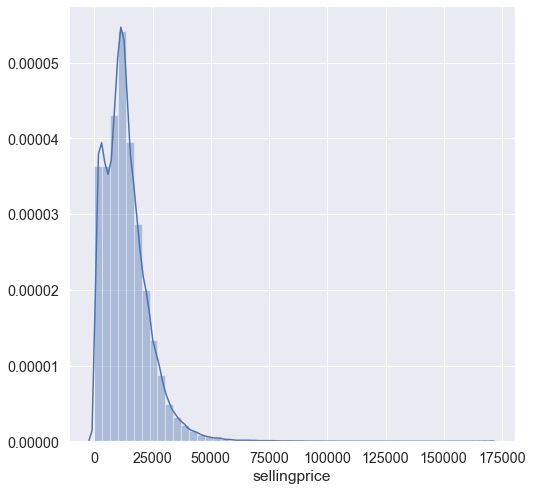

In [99]:
#sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.3)
#sns.distplot(df['sellingprice'])

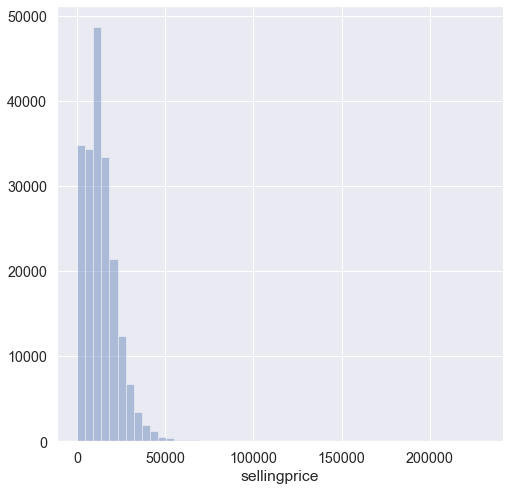

In [34]:
sns.distplot(df['sellingprice'],kde=False)

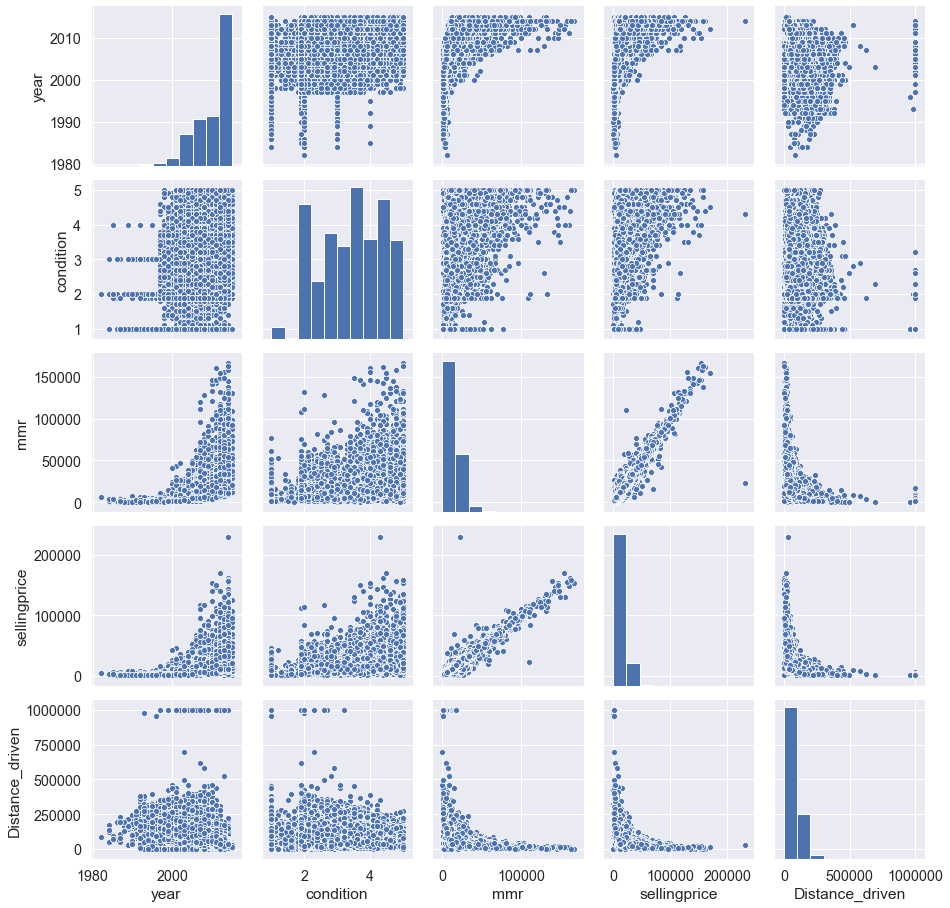

In [35]:
sns.pairplot(df)

C:\Users\nancy\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nancy\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nancy\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nancy\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


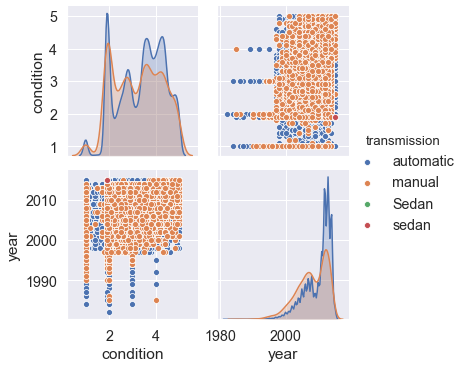

In [37]:
sns.pairplot(df,vars=['condition','year'],hue='transmission')

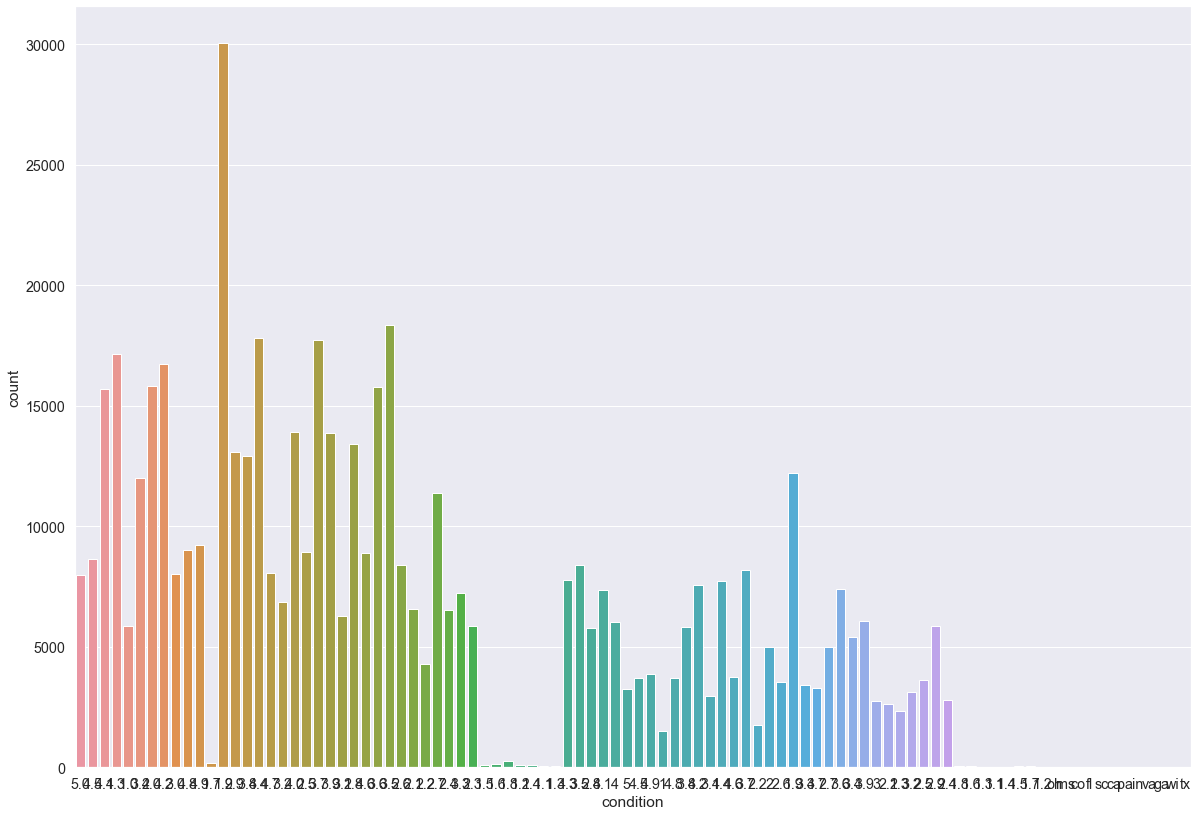

In [42]:
sns.set(rc={'figure.figsize': [20, 14]}, font_scale=1.3)
sns.countplot(x='condition',data=car_data)

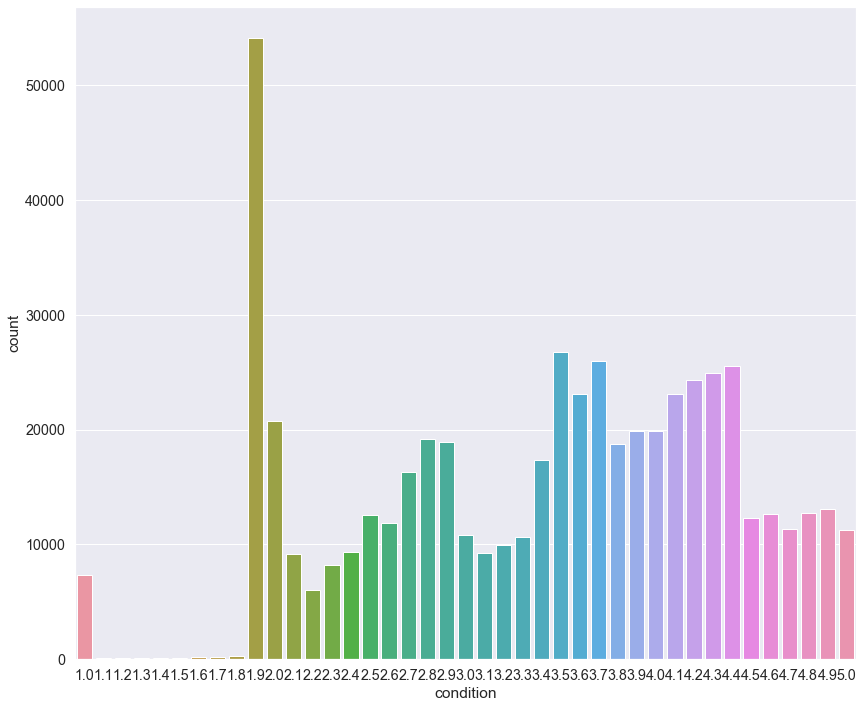

In [ ]:
sns.countplot(x='condition',data=car_data)

# Work with categorical data

In [100]:
label_encoder_x=LabelEncoder()
df['new_model']=label_encoder_x.fit_transform(df['model'])
df['new_make']=label_encoder_x.fit_transform(df['make'])

In [101]:
df[['model','new_model']]

,model,new_model
457482,TL,631
517512,RAV4,510
49375,Accord,56
162148,Passat,473
159553,Yaris,719
...,...,...
393131,Fusion,278
376198,FX,259
342403,Escape,238
449272,Express Cargo,250


In [102]:
u=dict(zip(df['model'],df['new_model']))
u

{'TL': 631,
 'RAV4': 510,
 'Accord': 56,
 'Passat': 473,
 'Yaris': 719,
 'Flex': 267,
 'Tacoma': 636,
 'C30': 108,
 'Altima': 65,
 'Suburban': 629,
 'RX 350': 523,
 'Soul': 622,
 'ES 350': 207,
 'Liberty': 387,
 'Cherokee': 150,
 'PT Cruiser': 468,
 'Versa': 684,
 'Pilot': 479,
 'Malibu': 414,
 'Monte Carlo': 442,
 'Impala': 343,
 'F-150': 251,
 'Fusion': 278,
 '500': 26,
 'Acadia': 54,
 'E-Class': 199,
 '3 Series': 8,
 'Fit': 265,
 'Charger': 149,
 'Forester': 272,
 'Quest': 506,
 'Terrain': 644,
 'G Convertible': 281,
 'Taurus': 640,
 'Expedition': 244,
 'RX 300': 521,
 'Explorer': 246,
 'Camry': 134,
 'CT 200h': 118,
 'Envoy': 227,
 'Grand Caravan': 320,
 'S-Class': 555,
 'Durango': 196,
 'Rogue': 549,
 'Forte': 273,
 'Avalanche': 77,
 'Town and Country': 654,
 'Optima': 463,
 'Journey': 358,
 '200': 4,
 'MKZ': 406,
 'Fiesta': 263,
 'Dakota': 190,
 'Nitro': 461,
 'Avenger': 80,
 '300': 10,
 'ES 300': 204,
 'Corolla': 175,
 'Regal': 539,
 'SX4': 581,
 'Sonata': 617,
 'Elantra': 217,


In [103]:
w=dict(zip(df['make'],df['new_make']))
w

{'Acura': 0,
 'Toyota': 46,
 'Honda': 17,
 'Volkswagen': 47,
 'Ford': 13,
 'Volvo': 48,
 'Nissan': 33,
 'Chevrolet': 7,
 'Lexus': 25,
 'Kia': 23,
 'Jeep': 22,
 'Chrysler': 8,
 'FIAT': 10,
 'GMC': 14,
 'Mercedes-Benz': 30,
 'BMW': 3,
 'Dodge': 9,
 'Subaru': 43,
 'Infiniti': 19,
 'Lincoln': 26,
 'Buick': 5,
 'Suzuki': 44,
 'Hyundai': 18,
 'Oldsmobile': 34,
 'Isuzu': 20,
 'HUMMER': 16,
 'Audi': 2,
 'Mazda': 29,
 'land rover': 65,
 'Scion': 42,
 'Mercury': 31,
 'MINI': 27,
 'chevrolet': 54,
 'Jaguar': 21,
 'Ram': 38,
 'Cadillac': 6,
 'Saturn': 41,
 'nissan': 75,
 'Pontiac': 36,
 'Mitsubishi': 32,
 'mazda': 70,
 'Porsche': 37,
 'Bentley': 4,
 'Land Rover': 24,
 'smart': 80,
 'Tesla': 45,
 'Maserati': 28,
 'dodge': 56,
 'mitsubishi': 74,
 'audi': 50,
 'jeep': 63,
 'cadillac': 53,
 'lexus': 67,
 'bmw': 51,
 'toyota': 83,
 'Plymouth': 35,
 'subaru': 81,
 'honda': 61,
 'acura': 49,
 'mercedes': 71,
 'Saab': 40,
 'ford': 57,
 'pontiac': 78,
 'volkswagen': 84,
 'chrysler': 55,
 'lincoln': 68,
 'm

In [104]:
df[df['new_model']==16]

,year,make,model,transmission,condition,mmr,sellingprice,Distance_driven,new_model,new_make
127350,2008,bmw,328i,1.0,3.5,12150.0,13900,49466.0,16,51


In [105]:
df

,year,make,model,transmission,condition,mmr,sellingprice,Distance_driven,new_model,new_make
457482,2013,Acura,TL,1.0,4.0,25300.0,25200,18044.0,631,0
517512,2012,Toyota,RAV4,1.0,4.4,20600.0,19500,18020.0,510,46
49375,1997,Honda,Accord,1.0,2.0,675.0,725,179892.0,56,17
162148,2012,Volkswagen,Passat,1.0,3.2,9475.0,10300,61637.0,473,47
159553,2014,Toyota,Yaris,1.0,1.0,10000.0,9700,39549.0,719,46
...,...,...,...,...,...,...,...,...,...,...
393131,2014,Ford,Fusion,1.0,4.1,15600.0,15300,17327.0,278,13
376198,2012,Infiniti,FX,1.0,3.4,25900.0,23100,55258.0,259,19
342403,2012,Ford,Escape,1.0,3.9,16050.0,16400,35751.0,238,13
449272,2005,Chevrolet,Express Cargo,1.0,3.0,6325.0,6800,106967.0,250,7


# Training and testing

In [119]:
x=df.drop(['make','model','sellingprice'],axis=1)
x

,year,transmission,condition,mmr,Distance_driven,new_model,new_make
457482,2013,1.0,4.0,25300.0,18044.0,631,0
517512,2012,1.0,4.4,20600.0,18020.0,510,46
49375,1997,1.0,2.0,675.0,179892.0,56,17
162148,2012,1.0,3.2,9475.0,61637.0,473,47
159553,2014,1.0,1.0,10000.0,39549.0,719,46
...,...,...,...,...,...,...,...
393131,2014,1.0,4.1,15600.0,17327.0,278,13
376198,2012,1.0,3.4,25900.0,55258.0,259,19
342403,2012,1.0,3.9,16050.0,35751.0,238,13
449272,2005,1.0,3.0,6325.0,106967.0,250,7


In [120]:
x.isnull().sum()

year               0
transmission       0
condition          0
mmr                0
Distance_driven    0
new_model          0
new_make           0
dtype: int64

In [121]:
y=df[['sellingprice']]
y

,sellingprice
457482,25200
517512,19500
49375,725
162148,10300
159553,9700
...,...
393131,15300
376198,23100
342403,16400
449272,6800


In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [123]:
x_train

array([[ 0.49581165,  0.1811752 ,  0.940624  , ..., -0.45339836,
        -1.26013493, -0.54894809],
       [ 0.74769967,  0.1811752 ,  1.56268997, ..., -1.25837018,
         1.38511332, -0.18039236],
       [ 0.74769967,  0.1811752 , -0.40718559, ..., -0.56548399,
        -0.28254318, -0.54894809],
       ...,
       [-0.76362844,  0.1811752 ,  0.83694634, ...,  0.71604837,
        -0.85759715, -0.84379266],
       [-1.01551646,  0.1811752 , -1.4439622 , ...,  1.72830183,
        -0.03335313,  0.11445222],
       [ 0.99958769,  0.1811752 ,  1.04430166, ..., -1.11177505,
         0.6471274 ,  0.18816336]])

In [37]:
#df.drop('sale_year',axis=1,inplace=True)

In [112]:
"""from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRFRegressor"""

'from sklearn.ensemble import RandomForestRegressor\nfrom sklearn.svm import SVR\nfrom xgboost import XGBRFRegressor'

In [124]:
models={
    'LR':LinearRegression(),
    'KNN':KNeighborsRegressor(),
    'DT':DecisionTreeRegressor(),
    'RF':RandomForestRegressor(),
    #'XGBR':XGBRFRegressor(),
    #'SVR':SVR(),
    
}

In [125]:
for name,model in models.items():
    print(f'using: {name}')
    model.fit(x_train,y_train)
    print(f'Train Accuracy: {model.score(x_train,y_train)}')
    print(f'Test Accuracy: {model.score(x_test,y_test)}')
    print('-'*30,'\n')
  

using: LR
Train Accuracy: 0.9745508450289662
Test Accuracy: 0.9747485883103002
------------------------------ 

using: KNN
Train Accuracy: 0.9802929486338898
Test Accuracy: 0.9703366878162557
------------------------------ 

using: DT
Train Accuracy: 0.9999999085882284
Test Accuracy: 0.9514639492564433
------------------------------ 

using: RF


C:\Users\nancy\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Train Accuracy: 0.9964167945077766
Test Accuracy: 0.974860859440839
------------------------------ 



In [126]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
print(f'Train Accuracy: {model.score(x_train,y_train)}')
print(f'Test Accuracy: {model.score(x_test,y_test)}')

Train Accuracy: 0.9999999085882284
Test Accuracy: 0.9522001406729373


In [127]:
y_pred=model.predict(x_test)
y_pred

array([16400., 24500., 13100., ..., 21250.,  4300., 11200.])

In [40]:
import numpy as np
np.average(y_pred)

13609.188075

In [41]:
model.score(x_train,y_train)

0.9999998146813044

In [42]:
model.score(x_test,y_test)

0.9507273450917645

In [118]:
x.columns

Index(['year', 'transmission', 'condition', 'mmr', 'Distance_driven',
       'new_model', 'new_make'],
      dtype='object')

In [56]:
df['year'].unique()

array([2009, 2013, 2012, 2006, 2010, 2014, 2007, 2008, 2005, 2003, 2002,
       1999, 2011, 2004, 2001, 2015, 1997, 2000, 1996, 1998, 1993, 1995,
       1994, 1991, 1987, 1989, 1992, 1990, 1985, 1988, 1986, 1984, 1982,
       1983], dtype=int64)

In [57]:
df['transmission'].unique()

array([1., 0.])

In [44]:
import joblib
joblib.dump(model,'model.h5')
joblib.dump(scaler,'scaler.h5')

['scaler.h5']